Dataset Info :
<bound method DataFrame.info of             id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Bala

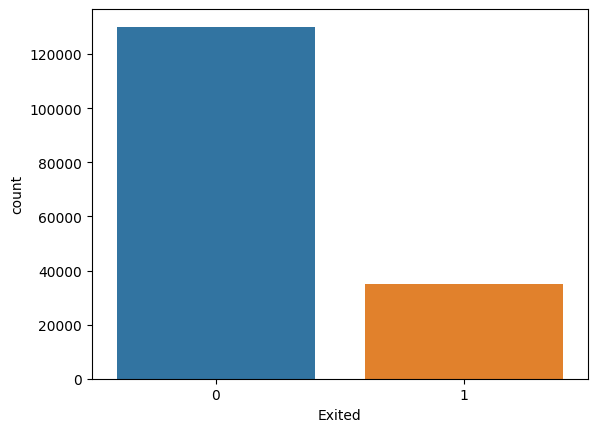

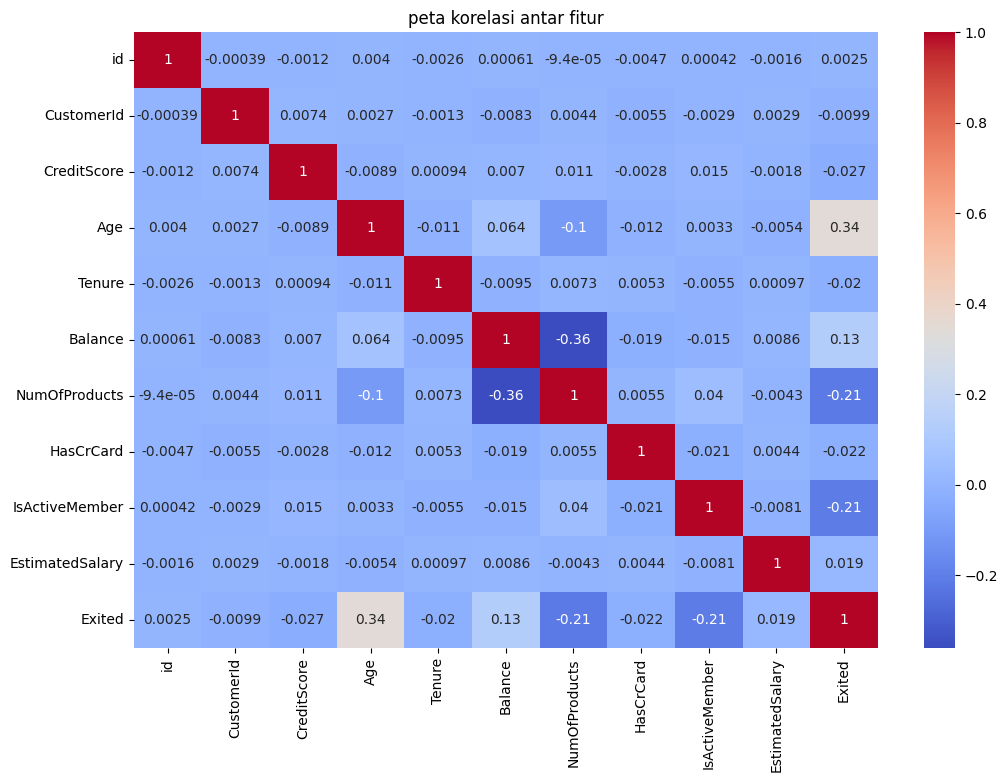

In [13]:
# Langkah penyelesaian
#1) Pemahaman Data
#2) Exploratory Data Analysis (EDA)
#3) Preprocessing Data
#4) Feature Engineering
#5) Pemilihan Model
#6) Pelatihan Model
#7) Evaluasi Model
#8) Optimasi Model:





import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
# Exploratory Data Analysis & statistik Deskriptif
print("Dataset Info :")
print(train_data.info)


print("\n Dataset Deskripsi :")
print(train_data.describe)


print("\n Head Dataset")
print(train_data.head)

test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
# Exploratory Data Analysis & statistik Deskriptif
#print(test_data.info)
#print(test_data.describe)
#print(test_data.head)

# Distribusi Target
sns.countplot(x='Exited', data=train_data)
plt.show

# Korelasi
# Hanya termasuk fitur numerik, eksklusi fitur kategori
print("Map : ")
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numeric_features].corr()
plt.figure(figsize=(12, 8))
plt.title("peta korelasi antar fitur")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()